<a href="https://colab.research.google.com/github/lindsayphan/Survey-Correlation-Analysis-Report/blob/main/survey_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mini Project

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#import data
all_df = pd.read_csv("miniProject.csv")
#remove whitespaces
all_df.columns = all_df.columns.str.strip()

#select columns
columns_to_select = ["Do you go to the gym?",
                     "How often do you go to the gym/workout?",
                     "When do you normally work out?",
                     "What type of workout do you do?",
                     "What are your primary fitness goals?",
                     "Which of the following genres do you listen to the majority of the time?",
                     "Do you make your own gym/workout playlist?"]
#make a new data frame of selected columns
df_music = all_df[columns_to_select].copy()
#change the name of columns
df_music = df_music.rename(columns = {"Do you go to the gym?" : "Gym",
                     "How often do you go to the gym/workout?" : "Frequency",
                     "When do you normally work out?" : "Time",
                     "What type of workout do you do?" : "Type",
                     "What are your primary fitness goals?" : "Goals",
                     "Which of the following genres do you listen to the majority of the time?" : "Genre",
                     "Do you make your own gym/workout playlist?" : "Playlist"})
#remove columns with na
df_music.dropna(inplace=True)
#reset the index
df_music.reset_index(drop=True, inplace=True)

#combine categories with only one reponse
to_replace = {
    'Coding music on Youtube': 'Other',
    'Trap': 'Other',
    'Synthwave': 'Other',
    'Blues': 'Other',
    'Classical': 'Other',
    'Breakcore': 'Other',
    'bollywood': 'Other',
    'Jazz': 'Other'
}
df_music['Genre'] = df_music['Genre'].replace(to_replace)

#combine redundant data
to_replace = {'Lift and cardio': 'Cardio and weights'}
df_music['Type'] = df_music['Type'].replace(to_replace)

df_music.head()

,Gym,Frequency,Time,Type,Goals,Genre,Playlist
0,Yes,Once per week,Morning,Weightlifting,Weight loss,Lofi,No
1,Yes,Several times per week,Evening,Weightlifting,Maintenance,Pop,Yes
2,Yes,Once per week,Evening,Weightlifting,Muscle gain,Lofi,Yes
3,Yes,Several times per week,Evening,Weightlifting,Weight loss,Lofi,Yes
4,Yes,Rarely,Afternoon,Cardio,Weight loss,Rap,No


## 1. What data do we have?
We received a data set from the survey given to students in CS105, CS111, and CS141. The survey consisted of personal preferences and facts for each student to answer. However, we focused on questions that were more relevant to our topic and analyzed them.

## 2. What would we like to know?
We would like to know what correlations there are between a student's music preferences and if they go to the gym. More specifically, we want to see if certain music genres are more heavily associated with those who have a specific workout,  fitness goals, and how frequently/infrequently they go to the gym.

## 3. Explore the Data


## Visualization #1

Gym    No  Yes
Genre         
EDM     0    6
Lofi    1    8
Other   2    6
Pop     4   10
R&B     0   11
Rap     0    9
Rock    1    6


<Axes: xlabel='Genre'>

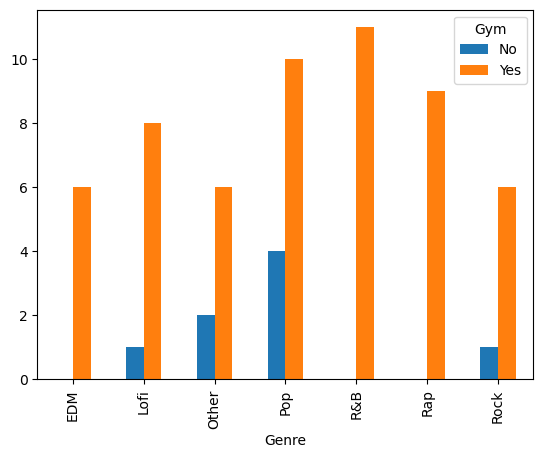

In [ ]:
#made a crosstable with music genre and if a student goes to the gym or not
gym_music_ct = pd.crosstab(df_music['Genre'], df_music['Gym'])
print(gym_music_ct)

#made a bar chart
gym_music_ct.plot.bar()

**Observation**: The bar chart above shows the genres of music that was listed in the survey and if the student goes to the gym or not. Here, we can see that most people tend to listen to R&B the most when they go to the gym. However, those who do not go to the gym tend to listen to more pop music.

## Visualization #2

Genre
Pop      14
R&B      11
Lofi      9
Rap       9
Other     8
Rock      7
EDM       6
Name: count, dtype: int64


<Axes: xlabel='Genre'>

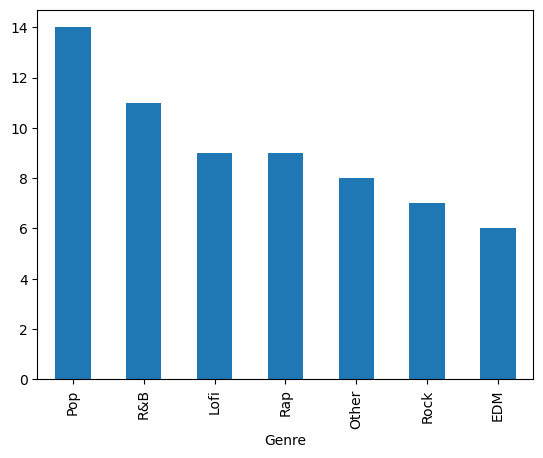

In [ ]:
#counted the amount of people that likes each music genre
gym_music_counts = df_music['Genre'].value_counts()
print(gym_music_counts)

#ploted a bar chart
gym_music_counts.plot(kind = 'bar')

**Observation**: The bar chart above shows the distribution of genres from the survey. We can see that the majority of the respondents prefer Pop as the genre they listen to the majority of the time. As we explore our data, we should keep in mind that the data can be skewed because of this.

## Visualization #3

<Axes: xlabel='Goals', ylabel='Genre'>

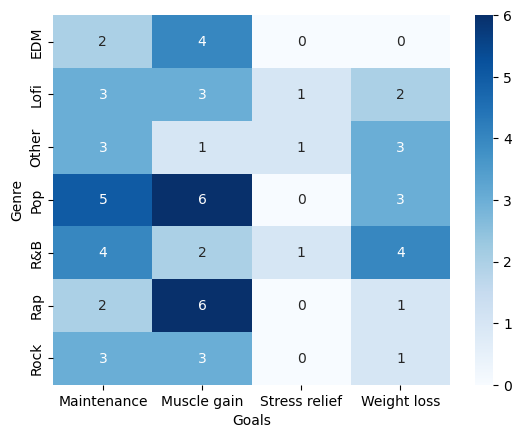

In [ ]:
#created a crosstable with music genre and fitness goals
goal_genre = pd.crosstab(df_music['Genre'], df_music['Goals'])

#created a heatmap using the crosstable
sns.heatmap(goal_genre, cmap = "Blues", annot = True)

**Observation:** The heat map above showcases the correlation between fitness goals and genre of music. We noticed that students that have muscle gain as their primary fitness goal tend to listen to more pop and rap. From the previous bar chart that compared music genre and going to the gym, we can see that the second most listed to genre is pop. In the heat map above, a majority of people that focus on muscle gain also listen to pop music. However, an equal amount of individuals that listen to rap also have muscle gain as their primary fitness goal. This suggests that those who chose pop or rap tend to have muscle gain as their fitness goal.

## Visualization #4

Frequency      1.0  2.0  3.0  4.0  5.0
Goals                                 
Maintenance      0    3   12    6    1
Muscle gain      4    2   16    3    0
Stress relief    2    0    1    0    0
Weight loss      1    1    6    6    0


<Axes: >

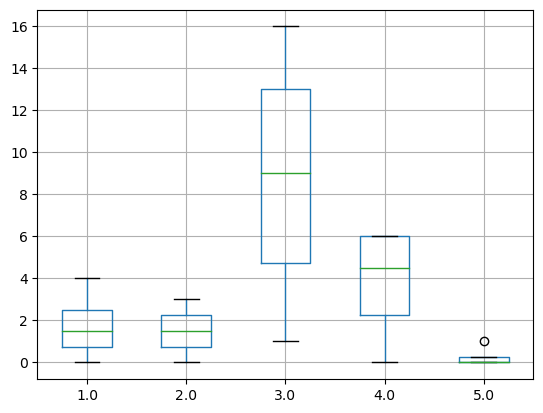

In [ ]:
#replace with numerical values
to_replace = {
    'Daily': '1',
    'Once per week': '2',
    'Several times per week': '3',
    'Rarely': '4',
    'Never': '5'
}
df_music['Frequency'] = df_music['Frequency'].replace(to_replace).astype(float)

#created a crosstable with fitness goals and how frequent/infrequent a person goes to the gym
goal_frequency = pd.crosstab(df_music['Goals'], df_music['Frequency'])
print(goal_frequency)

#created a box plot from the crosstable
goal_frequency.boxplot()

**Observation:** The box plot displays the number of people that frequent the gym and what their primary fitness goal is. Above, we noticed that majority of people that go to the gym several times per week, go for muscle gain. The lowest, not including those that responded "never", is once per week.

## Visualization #5

Time
Evening      31
Morning      22
Afternoon    11
Name: count, dtype: int64


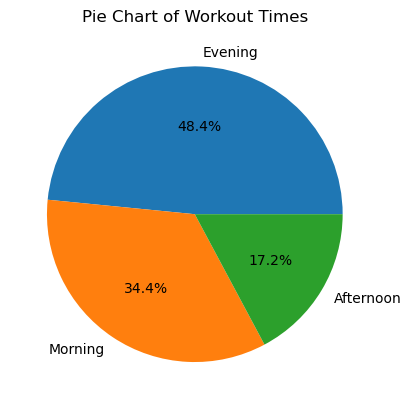

In [ ]:
#counted the amount of people that answered evening, morning, and afternoon for when they like to workout
time_counts = df_music['Time'].value_counts()
print(time_counts)

#created a pie chart
plt.pie(time_counts, labels = time_counts.index, autopct='%1.1f%%')

#changed the title of the pie chart
plt.title('Pie Chart of Workout Times')

#displayed the pie chart
plt.show()

**Observation:** The pie chart shows the distribution of the times a student a workouts (i.e. evening, afternoon, or morning). About 48% of people, which is a little less than half, like to workout in the evening and 17.2%, which is the lowest percentage among the 3, workout in the afternoon. This is an interesting perception of our data because from previous distributions, majority of people go to the gym several times a week. We can make a connection here that those that go several times a week tend to go in the evening.

## Visualization #6

Frequency
3.0    35
4.0    15
1.0     7
2.0     6
5.0     1
Name: count, dtype: int64


<Axes: xlabel='Frequency'>

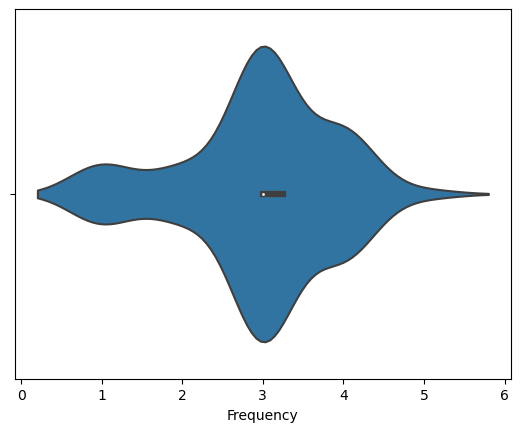

In [ ]:
#counted the number of people that picked each response
counts = df_music['Frequency'].value_counts()
print(counts)

#created a violin plot
sns.violinplot(x = df_music['Frequency'])

**Observation:** The violin plot showcases the distribution of how often students frequent the gym. We noticed that most people tend to frequent the gym several times per week as the highest peaks are around 3 (which is the response "several times per week"). Very few people chose "never" (which is classified as 5). The median of the data is at 3 and the IQR is around 3 to 3.5 which means that majority of people go to the gym several times per week.

## Visualization #7

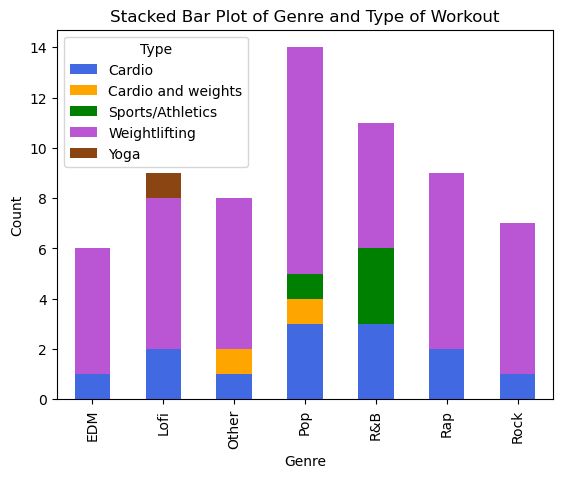

In [ ]:
#created a cross table with music genre and type of workout
type_ct = pd.crosstab(df_music['Genre'], df_music['Type'])
type_ct

#created a stacked bar chart
type_ct.plot.bar(stacked=True, color = {'Cardio and weights': 'orange', 'Cardio': 'royalblue', 'Sports/Athletics': 'green', 'Weightlifting': 'mediumorchid', 'Yoga': 'saddlebrown'})

#labels
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Genre and Type of Workout')

#legend
plt.legend(title='Type')

plt.show()

**Observation:** The stacked bar chart above shows the distribution of the genres and the type of workout they do. We can see that the majority of students listen to the pop music genre and do weightlifting at the gym. The least listened to genre is EDM, but weightlifting is still what most people do at the gym. Overall, we can see that weightlifting is the most preferred workout type which is what we have been noticing throughout our previous graphs. The workout type that is the least used is yoga and cardio and weights.

## Visualization #8

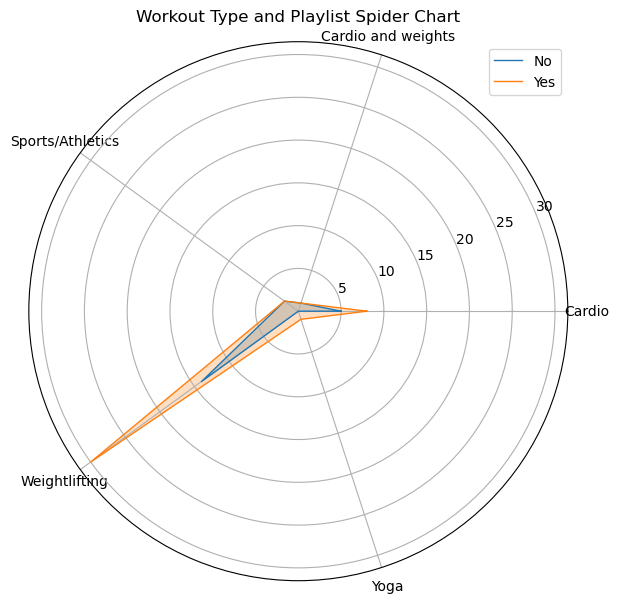

In [ ]:
#created a crosstable
type_playlist_ct = pd.crosstab(df_music['Playlist'], df_music['Type'])
type_playlist_ct

#setting up a radar chart
num_categories = len(type_playlist_ct.columns)
theta = np.linspace(0, 2*np.pi, num_categories, endpoint=False)  #set the evenly spaced angles
theta = np.concatenate((theta,[theta[0]]))  #connects the last point back to the first point to close the polygon

#setting up the plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, polar=True)

#plotted each row of data
for i, row in type_playlist_ct.iterrows():
    values = row.values.astype(float)  #gets the values for this row
    values = np.concatenate((values,[values[0]]))  #connects the last point back to the first point to close the polygon
    ax.plot(theta, values, linewidth=1, label=i) #plots the values
    ax.fill(theta,  values, alpha = 0.25) #fills in the area inside the polygon

#changed the degree labels
ax.set_thetagrids(np.linspace(0, 360, num_categories, endpoint=False), labels=type_playlist_ct.columns)

#added legend and title
plt.legend()
ax.set_title('Workout Type and Playlist Spider Chart')

#displays the plot
plt.show()

**Observation:** The spider chart above shows the distribution of workout type and if a student has created a gym playlist. We noticed that most people that do weightlifting at the gym tend to make a gym playlist. It is also notable that those that do not create a gym playlist also pursue weightlifting at the gym. We can also see that most people do create a gym playlist as the polygon overshadows the polygon that represents people that do not create a playlist.

## Question 4
There are 3 hypotheses we can draw from our data. Our first hypothesis is: there is no correlation between music genre and going to the gym. Our second hypothesis is: there is no correlation between music genre and type of gym workout. And finally, our third hypothesis is: there is a correlation between the type of workout and making a gym playlist. We can apply correlation analysis  to our first hypothesis and the chi-squared test to hypotheses 2 and 3.

## Question 5

## Hypothesis 1

$H_0$: There is no correlation between music genre and going to the gym.  

The tests used will be Cramer's V for correlation analysis.

In [ ]:
#correlation between music and going to the gym
genre_gym_ct = pd.crosstab(df_music['Gym'], df_music['Genre'])

genre_gym_df = pd.DataFrame(genre_gym_ct)
print(genre_gym_df)

# calculate the chi-square value of the dataset
from scipy.stats import chi2_contingency, chi2
chi, p, dfree, expected = chi2_contingency(genre_gym_df)
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
print("degree of freedom: ", dfree)

# get the threshold to reject the hypothesis by certain significance value and the degree of the freedom.
print(f"For 6 degrees of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level: {chi2.ppf(0.95, 6)}\n")

X2 = 8.199546485260772

# set n, k, r for Cramer's V
n = genre_gym_ct.sum().sum()
k = genre_gym_ct.shape[0]
r = genre_gym_ct.shape[1]

# calculate Cramer's V
cramers_v = np.sqrt(X2 / (n * min(k - 1, r - 1)))
print(f"Cramér's V: {cramers_v}")

Genre  EDM  Lofi  Other  Pop  R&B  Rap  Rock
Gym                                         
No       0     1      2    4    0    0     1
Yes      6     8      6   10   11    9     6
calculated chi square value:  8.199546485260772
calculated p value:  0.2238455689257214
degree of freedom:  6
For 6 degrees of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level: 12.591587243743977

Cramér's V: 0.3579356280564978


**Conclusion**: The Cramer's V was calculated for a measure of correlation because Pearson's correlations of variables was not suitable for the categorical data. To calculate Cramer's V, the chi-square value was used and we found that Cramer's V for our data is 0.36, which is not a strong correlation. Based on the Cramer's V, there is a weak association between music genre and going to the gym.

## Hypothesis 2

$H_0$: There is no correlation between music genre and type of gym workout.  

The test used will be chi-square analysis.

In [ ]:
#music genre and type of gym workout
genre_type_ct = pd.crosstab(df_music['Type'], df_music['Genre'])

genre_type_df = pd.DataFrame(genre_type_ct)
print(genre_type_df)

# calculate the chi-square value of the dataset
chi, p, dfree, expected = chi2_contingency(genre_type_df)
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
print("degree of freedom: ", dfree)

# get the threshold to reject the hypothesis by certain significance value and the degree of the freedom.
print(f"For 24 degrees of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level: {chi2.ppf(0.95, 24)}")

Genre               EDM  Lofi  Other  Pop  R&B  Rap  Rock
Type                                                     
Cardio                1     2      1    3    3    2     1
Cardio and weights    0     0      1    1    0    0     0
Sports/Athletics      0     0      0    1    3    0     0
Weightlifting         5     6      6    9    5    7     6
Yoga                  0     1      0    0    0    0     0
calculated chi square value:  22.88398470216652
calculated p value:  0.5266552918123595
degree of freedom:  24
For 24 degrees of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level: 36.41502850180731


**Conclusion**: Since the calculated chi-square value of 22.88 is less than the critical value of 36.42, the null hypothesis cannot be rejected. In addition, the calculated p-value is 0.53, which is much greater than the significance level of 0.05 and shows that there is not sufficient evidence to reject the null hypothesis. Based on our data, there is no correlation between music genre and type of gym workout because our data is not statistically significant.

## Hypothesis 3

$H_0$: There is no correlation between between and individual's type of workout and whether they make a playlist.  
$H_A$: (Our Hypothesis) There is a correlation between between and individual's type of workout and whether they make a playlist.

The test used will be chi-square analysis.

In [ ]:
#gym goal and frequency of working out
type_playlist_ct = pd.crosstab(df_music['Type'], df_music['Playlist'])

type_playlist_df = pd.DataFrame(type_playlist_ct )
print(type_playlist_df)

# calculate the chi-square value of the dataset
chi, p, dfree, expected = chi2_contingency(type_playlist_df )
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
print("degree of freedom: ", dfree)

# get the threshold to reject the hypothesis by certain significance value and the degree of the freedom.
print(f"For 4 degrees of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level: {chi2.ppf(0.95, 4)}")

Playlist            No  Yes
Type                       
Cardio               5    8
Cardio and weights   1    1
Sports/Athletics     2    2
Weightlifting       14   30
Yoga                 0    1
calculated chi square value:  1.3969061241788512
calculated p value:  0.8447325684388635
degree of freedom:  4
For 4 degrees of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level: 9.487729036781154


**Conclusion**: Since the chi-square value of 1.40 is less than the critical of 9.49, and the p-value of 0.84 is greater than the significance level of 0.05, the null hypothesis cannot be rejected. This chi-square analysis to determine if there is correlation between the type of workout and making a playlist was performed because of Visualization #8. The spider chart seemed to show that individuals that weightlift were more likely to make their own playlist. However, based on the chi-square analysis, there is no statistical significance in the data. Thus, there is no correlation between an individual's type of workout and whether they make a playlist.

## Overall Conclusion
In this mini research project, we analyzed data from student responses on questions related to the gym and their music preferences. When we look at the visualizations of our data, some are skewed, which suggests that there may be correlation between variables in our data. However, based on the correlation analyses and chi-square tests above, none of the null hypothesis were rejected because the data was not statistically significant.